In [ ]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 16.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from deep_translator import GoogleTranslator
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Task_8')
os.listdir()
Trans_Eng =pd.read_csv('English.csv')
Trans_Eng.head()

Mounted at /content/drive


,English words/sentences
0,Hi.
1,Run!
2,Run!
3,Who?
4,Wow!


###TASK_1

**You need to translate each word or sentence from English to Spanish, French and German**

In [ ]:
Trans_En = pd.DataFrame(Trans_Eng["English words/sentences"].unique()).rename(columns = {0:'English Words'})
print(Trans_En)

                                            English Words
0                                                     Hi.
1                                                    Run!
2                                                    Who?
3                                                    Wow!
4                                                   Fire!
...                                                   ...
123095  Top-down economics never works, said Obama. "T...
123096  A carbon footprint is the amount of carbon dio...
123097  Death is something that we're often discourage...
123098  Since there are usually multiple websites on a...
123099  If someone who doesn't know your background sa...

[123100 rows x 1 columns]


In [ ]:
Trans_En["English Words"] = Trans_En["English Words"].str.replace("[^a-zA-Z0-9]", " ") 
Trans_En["English Words"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                                                       Hi 
1                                                      Run 
2                                                      Who 
3                                                      Wow 
4                                                     Fire 
                                ...                        
123095    Top down economics never works  said Obama   T...
123096    A carbon footprint is the amount of carbon dio...
123097    Death is something that we re often discourage...
123098    Since there are usually multiple websites on a...
123099    If someone who doesn t know your background sa...
Name: English Words, Length: 123100, dtype: object

In [ ]:
Trans_En["English Words"].head(50)

0          Hi 
1         Run 
2         Who 
3         Wow 
4        Fire 
5        Help 
6        Jump 
7        Stop 
8        Wait 
9       Go on 
10      Hello 
11      I see 
12      I try 
13      I won 
14      I won 
15      Oh no 
16     Attack 
17     Cheers 
18     Get up 
19     Go now 
20     Got it 
21     Got it 
22     Hop in 
23     Hug me 
24     I fell 
25     I know 
26     I left 
27     I lied 
28     I lost 
29     I paid 
30     I m 19 
31     I m OK 
32     Listen 
33     No way 
34     Really 
35     Thanks 
36     We try 
37     We won 
38    Ask Tom 
39    Awesome 
40    Be calm 
41    Be cool 
42    Be fair 
43    Be kind 
44    Be nice 
45    Beat it 
46    Call me 
47    Call us 
48    Come in 
49    Come on 
Name: English Words, dtype: object

**Translate each word or sentence from english to french**

In [ ]:
def Translate(rev):
    translation_tokenized = GoogleTranslator(source='english', target='fr').translate(rev)
    return translation_tokenized

**Translate each word from English to French. Displaying 50 words**

In [ ]:
Trans_French_Words = [Translate(r) for r in Trans_En["English Words"].head(50)]
Trans_French_Words

['Salut',
 'Courir',
 'Qui',
 'Ouah',
 'Feu',
 'Aider',
 'Saut',
 'Arrêt',
 'Attendre',
 'Continue',
 'Bonjour',
 'Je vois',
 "J'essaye",
 "J'ai gagné",
 "J'ai gagné",
 'Oh non',
 'Attaque',
 'Acclamations',
 'Se lever',
 'Allez maintenant',
 "J'ai compris",
 "J'ai compris",
 'Monter dedans',
 'Donne moi un câlin',
 'je suis tombé',
 'je sais',
 'Je suis parti',
 "j'ai menti",
 "J'ai perdu",
 "j'ai payé",
 "J'ai 19 ans",
 'Je vais bien',
 'Ecoutez',
 'Certainement pas',
 'Vraiment',
 'Merci',
 'Nous essayons',
 'Nous avons gagné',
 'Demander à Tom',
 'Impressionnant',
 'Sois calme',
 'Soit cool',
 'Être juste',
 'Etre gentil',
 'Sois gentil',
 'Batte-le',
 'Appelez-moi',
 'Appelez-nous',
 'Entrez',
 'Allez']

**Translate each sentence from English to French. Displaying 50 sentences**

In [ ]:
Trans_French_Sentence = [Translate(r) for r in Trans_En["English Words"].tail(50)]
Trans_French_Sentence


["Ma mère m'a toujours dit que je devais mettre de l'argent à la banque tous les mois pour avoir assez d'argent en cas d'urgence",
 'La différence entre le mot juste et presque le mot juste est la différence entre la foudre et le bogue de la foudre',
 'Nous voyons avec nos yeux nous entendons avec nos oreilles nous touchons avec notre peau nous sentons avec notre nez et nous goûtons avec notre langue',
 "Si vous ne déjeunez pas, vous aurez probablement faim le matin et vous ne serez pas aussi efficace au travail que vous pourriez l'être.",
 "L'un des avantages d'être vieux est que vous ne désirez plus toutes les choses que vous ne pouviez pas vous permettre d'acheter quand vous étiez jeune.",
 "Je regardais beaucoup cet anime quand j'étais enfant mais je ne me souviens pas très bien de ce qui est arrivé au héros dans l'épisode final",
 "Dans le même laps de temps qu'il me faudrait pour corriger toutes les erreurs de votre rapport, je pourrais rédiger moi-même un meilleur rapport",
 'La

**Translate each word or sentence from English to German**

In [ ]:
def Translate_De(rev):
    translation_tokenized = GoogleTranslator(source='english', target='de').translate(rev)
    return translation_tokenized

**Translate each word from English to German. Displaying 50 words**

In [ ]:
Trans_German_Words = [Translate_De(r) for r in Trans_En["English Words"].head(50)]
Trans_German_Words

['Hi',
 'Laufen',
 'Wer',
 'Wow',
 'Feuer',
 'Hilfe',
 'Springen',
 'Halt',
 'Warte ab',
 'Mach weiter',
 'Hallo',
 'Aha',
 'ich versuche',
 'ich habe gewonnen',
 'ich habe gewonnen',
 'Ach nein',
 'Attacke',
 'Prost',
 'Steh auf',
 'Geh jetzt',
 'Ich habs',
 'Ich habs',
 'Steigen Sie ein',
 'Umarme mich',
 'Ich fiel',
 'Ich weiss',
 'Ich ging weg',
 'ich habe gelogen',
 'Ich habe verloren',
 'ich habe bezahlt',
 'Ich bin 19',
 'Ich bin OK',
 'Hör mal zu',
 'Auf keinen Fall',
 'Wirklich',
 'Vielen Dank',
 'Wir versuchen',
 'Wir haben gewonnen',
 'Frag Tom',
 'Genial',
 'Ruhig sein',
 'Sei cool',
 'Sei fair',
 'Sei freundlich',
 'Sei nett',
 'Mach dich vom Acker',
 'Ruf mich an',
 'Rufen Sie uns an',
 'Komm herein',
 'Komm schon']

**Translate each sentence from English to German. Displaying 50 sentences**

In [ ]:
Trans_German_Sentence = [Translate_De(r) for r in Trans_En["English Words"].tail(50)]
Trans_German_Sentence

['Meine Mutter hat mir immer gesagt, dass ich jeden Monat Geld auf die Bank bringen soll, damit ich im Notfall genug Geld habe',
 'Der Unterschied zwischen dem richtigen Wort und dem fast richtigen Wort ist der Unterschied zwischen Blitz und Blitzkäfer',
 'Wir sehen mit unseren Augen, wir hören mit unseren Ohren, wir berühren mit unserer Haut, wir riechen mit unserer Nase und wir schmecken mit unserer Zunge',
 'Wenn Sie nicht frühstücken, werden Sie wahrscheinlich morgens hungrig sein und bei der Arbeit nicht so effizient sein, wie Sie es sein könnten',
 'Ein Vorteil des Altseins ist, dass man sich all die Dinge, die man sich in jungen Jahren nicht leisten konnte, nicht mehr wünscht',
 'Ich habe diesen Anime oft gesehen, als ich ein Kind war, aber ich kann mich nicht genau erinnern, was mit dem Helden in der letzten Folge passiert ist',
 'In der gleichen Zeit, die ich brauchen würde, um alle Fehler in Ihrem Bericht zu korrigieren, könnte ich selbst einen besseren Bericht schreiben',
 '

**Translate each word or sentence from English to Spanish**

In [ ]:
def Translate_Es(rev):
    translation_tokenized = GoogleTranslator(source='english', target='es').translate(rev)
    return translation_tokenized

**Translate each word from English to Spanish. Displaying 50 words**

In [ ]:
Trans_Spanish_Words = [Translate_Es(r) for r in Trans_En["English Words"].head(50)]
Trans_Spanish_Words

['Hola',
 'Correr',
 'Quién',
 'Guau',
 'Fuego',
 'Ayuda',
 'Salto',
 'Deténgase',
 'Esperar',
 'Continuar',
 'Hola',
 'ya veo',
 'lo intento',
 'gané',
 'gané',
 'Oh, no',
 'Ataque',
 'Salud',
 'Levantarse',
 'Ve ahora',
 'Entiendo',
 'Entiendo',
 'súbete',
 'Abrázame',
 'Me caí',
 'lo sé',
 'me fui',
 'mentí',
 'perdí',
 'He pagado',
 'Tengo 19',
 'Estoy bien',
 'Escuchar',
 'De ninguna manera',
 'En realidad',
 'Gracias',
 'Intentamos',
 'Ganamos',
 'preguntale a tom',
 'Impresionante',
 'Estate calmado',
 'Relájate',
 'Sé justo',
 'Se amable',
 'Se bueno',
 'Batirlo',
 'Llámame',
 'Llámanos',
 'Adelante',
 'Vamos']

**Translate each sentence from English to Spanish. Displaying 50 sentences**

In [ ]:
Trans_Spanish_Sentence = [Translate_Es(r) for r in Trans_En["English Words"].tail(50)]
Trans_Spanish_Sentence

['Mi madre siempre me decía que debía poner dinero en el banco todos los meses para tener suficiente dinero en caso de una emergencia.',
 'La diferencia entre la palabra correcta y casi la palabra correcta es la diferencia entre el rayo y la luciérnaga.',
 'Vemos con nuestros ojos escuchamos con nuestros oídos tocamos con nuestra piel olemos con nuestra nariz y saboreamos con nuestra lengua',
 'Si no desayunas, probablemente tendrás hambre durante la mañana y no serás tan eficiente en el trabajo como podrías.',
 'Una ventaja de ser viejo es que ya no deseas todas las cosas que no podías comprar cuando eras joven.',
 'Solía \u200b\u200bver mucho este anime cuando era niño, pero no recuerdo bien qué le pasó al héroe en el episodio final.',
 'En la misma cantidad de tiempo que me tomaría corregir todos los errores en su informe, podría escribir un mejor informe yo mismo',
 'El idioma inglés es sin duda el medio más fácil y al mismo tiempo más eficiente de comunicación internacional.',
 'P

###TASK_2

**Create a program that needs to automatically correct that spelling from the word or a given sentence. (Language : English)**

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 4.9 MB/s 


In [ ]:
from spellchecker import SpellChecker
 
specheck = SpellChecker()

misspelled_words = specheck.unknown(["cmputr", "watr", "wriet", "athist", "acceptible", "benifit", "acommodate", "amatuer", "acknowlege", "becomeing", 
                            "camoflague", "catagory", "cauhgt", "cematery", "apparrent", "congradulate", "conceed", "definit", "disasterous", "dilema",
                            "equiptment ", "excede", "experiance", "innoculate", "extreem", "guage", "gratful", "guidence", "heirarchy", "dumbell",
                            "necessery", "inteligence", "kernal", "libary", "outragous", "marshmellow", "miniture", "medeval", "nieghbor", "origenal"])

for word in misspelled_words:
    print(specheck.correction(word))

write
library
equipment
water
atheist
accommodate
marshmallow
miniature
camouflage
kernel
benefit
outrageous
definite
medieval
disastrous
gauge
acknowledge
category
inoculate
concede
becoming
neighbor
hierarchy
exceed
apparent
caught
guidance
dilemma
experience
grateful
intelligence
computer
cemetery
amateur
extreme
congratulate
dumbbell
acceptable
necessary
original


In [ ]:
!sudo apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (8,274 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fr

In [ ]:
!sudo pip install jamspell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 8.8 MB/s 
  Created wheel for jamspell: filename=jamspell-0.0.12-cp37-cp37m-linux_x86_64.whl size=1347629 sha256=b42cadc6dc24a6646e169bd661439b69696be416bb45d15844c5ad72b59bd53c
  Stored in directory: /root/.cache/pip/wheels/68/df/9c/9b335e69aa0f28e7f508ec0ebefadcc703f168beb52ae7ebe7
Successfully built jamspell


In [ ]:
!wget https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz

--2022-06-09 06:14:37--  https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bakwc/JamSpell-models/master/en.tar.gz [following]
--2022-06-09 06:14:37--  https://raw.githubusercontent.com/bakwc/JamSpell-models/master/en.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36611828 (35M) [application/octet-stream]
Saving to: ‘en.tar.gz.1’

en.tar.gz.1         100%[===================>]  34.92M  49.4MB/s    in 0.7s    

2022-06-09 06:14:40 (49.4 MB/s) - ‘en.tar.gz.1’ saved [36611828/36611828]



In [ ]:
!tar -xvf en.tar.gz

en.bin


In [ ]:
import jamspell

**spell corrections for sentences**

In [ ]:
# Load Language model
jsp = jamspell.TSpellCorrector()
assert jsp.LoadLangModel('en.bin')
 
# To fix text automatically run FixFragment:
print(jsp.FixFragment("I am the begt spell cherken"))
print(jsp.FixFragment("Watre fell on my computr"))
print(jsp.FixFragment("Athiest is one who does not beleve in God"))
print(jsp.FixFragment("I am extreemly greatful to you"))
print(jsp.FixFragment("Is this reelly necessery?"))
print(jsp.FixFragment("I am in a real dilema whether to buy flourescent bulb or a LED bulb"))
print(jsp.FixFragment("He conceeded defeat and congradulated the winner"))
print(jsp.FixFragment("His nieghbor has a libary at the end of this streat"))
print(jsp.FixFragment("He perfomed well in Miniture Golf and exceded everyone's expectation"))
print(jsp.FixFragment("Due to heavy rains, the brige colapsed and resulted in a number of casulities"))
print(jsp.FixFragment("Pationce is a vitue"))
print(jsp.FixFragment("Taking a week-long vacaton would braek the bank. There’s no way I could aford to do it"))
print(jsp.FixFragment("The traffic cop receves kicbacks for not writting tickets to politicians"))
print(jsp.FixFragment("The Louvre Musem in Paris has the genuin Mona Lisa"))

I am the best spell checker
Water fell on my computer
Atheist is one who does not believe in God
I am extremely grateful to you
Is this really necessary?
I am in a real dilemma whether to buy fluorescent bulb or a LED bulb
He conceded defeat and congratulated the winner
His neighbor has a library at the end of this street
He performed well in Miniature Golf and exceeded everyone's expectation
Due to heavy rains, the bridge collapsed and resulted in a number of casualties
Patience is a virtue
Taking a week-long vacation would break the bank. There’s no way I could afford to do it
The traffic cop receives kickbacks for not writing tickets to politicians
The Louvre Museum in Paris has the genuine Mona Lisa


#TASK_3

For this task i  download dataset from kaggle

https://www.kaggle.com/gauravduttakiit/resume-dataset

In [ ]:
resumeDataset =pd.read_csv('UpdatedResumeDataSet.csv')
resumeDataset.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
resumeDataset.shape

(962, 2)

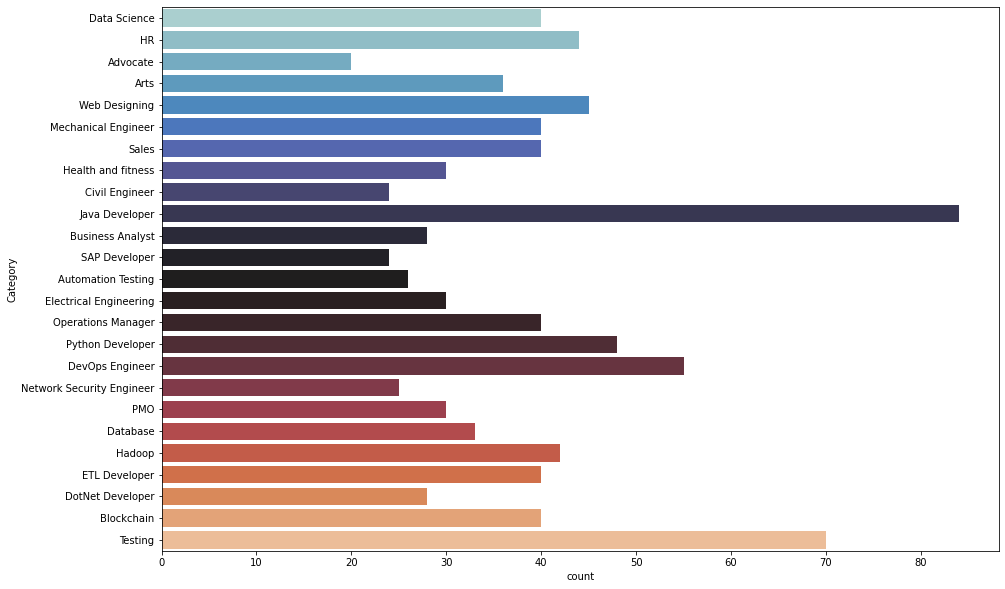

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=resumeDataset, y='Category', palette='icefire')
plt.show()

In This dataset we have 962 Resumes.The top 3 job categories are follow

*   Java Developer
*   Testing

*   DevOps Engineer





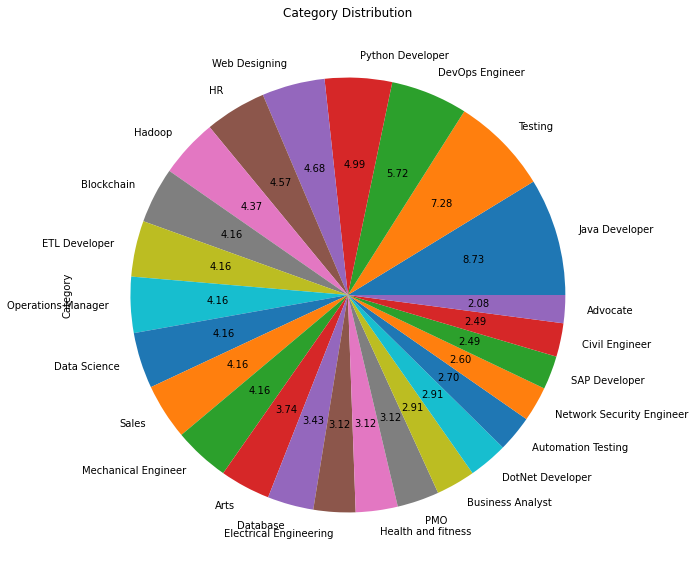

In [ ]:
resumeDataset.Category.value_counts().plot(kind='pie', autopct="%.2f", figsize=(15,10))
plt.title("Category Distribution")
plt.show()

In [ ]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
resumeDataset['cleaned_resume'] = resumeDataset.Resume.apply(lambda x: cleanResume(x))

In [ ]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataset[i] = le.fit_transform(resumeDataset[i])

In [ ]:
requiredText = resumeDataset['cleaned_resume'].values
requiredTarget = resumeDataset['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [ ]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99


In [ ]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
          17       1.00    

Where, 0, 1, 2…. are the job categories. We get the actual labels from the label encoder that we used.

In [ ]:
le.classes_


array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

Here ‘Advocate’ is class 0, ‘Arts’ is class 1, and so on…

#TASK_4